# Homework 6 Regression Refresher

In class, we considered a very simply algorithm called gradient descent that we used to estimate the parameters of a simple linear model. But we left many considerations open. These include:
- Normalization 
    - We saw that the SSE is a very big number in our example, leading us to choose awkwardly small learning rates. Normaling the error may help us use more reasonably sized learning rates.
- When to stop
    - We can tell the algorithm to stop after a set number of iterations or, something smarter, tell it to stop when it begins to take very small step sizes
- Multiple solutions
    - It should be obvious that gradient descent, as an algorithm, doesn't do much "thinking". 
    - If there are multiple solutions, it will only find one
        - This is similar to issues we've seen before with the fsolve and roots commands.
        

## Problem 1

Regression algorithms ultimately search for minima. This can be where an error function is minimized (as we saw in class) or when a polynomial equation is minimized. Using the code from our lecture, adapt the code in order to indentify the roots of the following equation: 

$x^3 - 6x^2 +11x = 6$
    
Since the polynomial will have more than 1 solution, be sure to consider multiple starting guesses. Use the "roots" function from numpy to check your answer.

Our best value for our slope is  2.9816914955546068  with SSE 0.03561754192083555


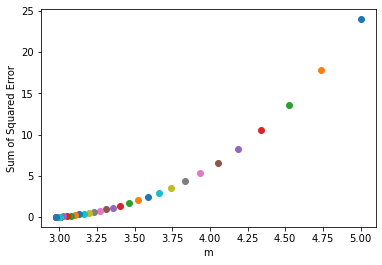

In [6]:
import numpy as np;
import math
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

def f(x):
    f = x**3-6*x**2+11*x-6;
    return f;

# In this case, the error is simple f since we want the solution f = 0. All we need is the derivative. But I will adapt the
# code from lecture for clearity

def SSE(m):
    ERR = 0 -f(m);
    SSE = np.sum(ERR**2);
    
    # discuss RSS in class.
    return np.sqrt(SSE);

def derivative(m):
    DERIVATIVE = (SSE(m+0.01)-SSE(m))/0.01;
    return DERIVATIVE



n = 0;
current_m = 5; # Our initial guess
rate = 0.01; # Try raising in very small increments, from 0.000001 to 0.00001

# Plot our initial guess' SSE and label zero
plt.plot(current_m, SSE(current_m),'o');
#plt.text(current_m, SSE(current_m),n);

while n < 1000:
    new_m = current_m - rate * derivative(current_m);
    current_m=new_m;
    # print(new_m);
    n = n + 1;
    plt.plot(new_m, SSE(new_m),'o');
    #plt.text(new_m, SSE(new_m),n);
    
print("Our best value for our slope is ", new_m, " with SSE", SSE(new_m))
plt.xlabel("m");
plt.ylabel("Sum of Squared Error");



In [2]:
SSE(np.arange(0,1,.1))

99.86080499999997

Text(0, 0.5, 'Sum of Squared Error')

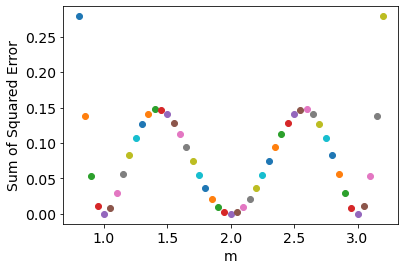

In [8]:
for m in np.arange(.8,3.2,.05):
     plt.plot(m, SSE(m),'o');
 
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("m")
plt.ylabel("RSS");